In [110]:
%matplotlib inline
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression

In [2]:
# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

C:\Users\Obama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targe

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
boston.data.shape

(506, 13)

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [10]:
bos = pd.DataFrame(boston.data)

In [11]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bos.columns = boston.feature_names

In [13]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston.target.shape

(506,)

In [15]:
bos["price"]=boston.target

In [16]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
bos.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  price  
0       15.3  396.90   4.98 

Text(0.5, 1.0, 'Relationship between CRIM and Price')

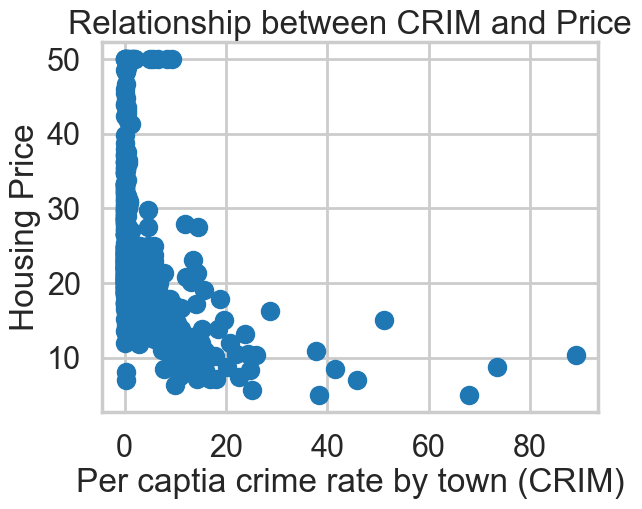

In [19]:
plt.scatter(bos.CRIM,bos.price)
plt.xlabel("Per captia crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

In [ ]:
#Part 2 Checkup Exercise Set 1

# Exercise: What kind of relationship do you see? e.g. positive,
# negative? linear? non-linear? Is there anything else strange
# or interesting about the data? What about outliers?

# The relationship seems to be the higher the housing price
# the crime rate is lower. With a heavy skew towards low crime rates.

Text(0.5, 1.0, 'Relationship between RM and Price')

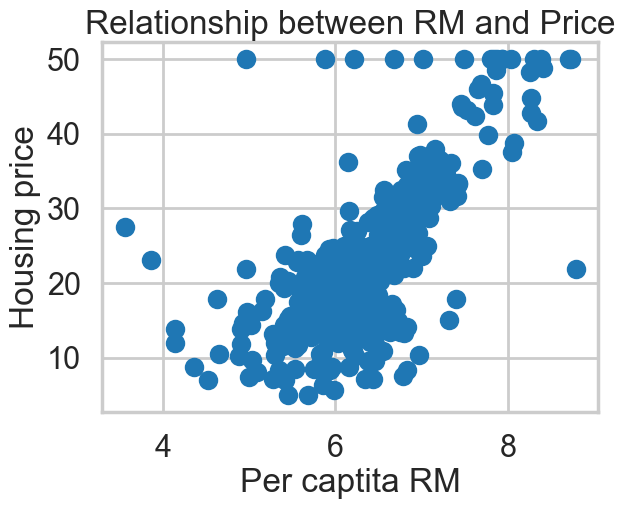

In [20]:
plt.scatter(bos.RM, bos.price)
plt.xlabel("Per captita RM")
plt.ylabel("Housing price")
plt.title("Relationship between RM and Price")

Text(0.5, 1.0, 'Relationship between PT Ration and price')

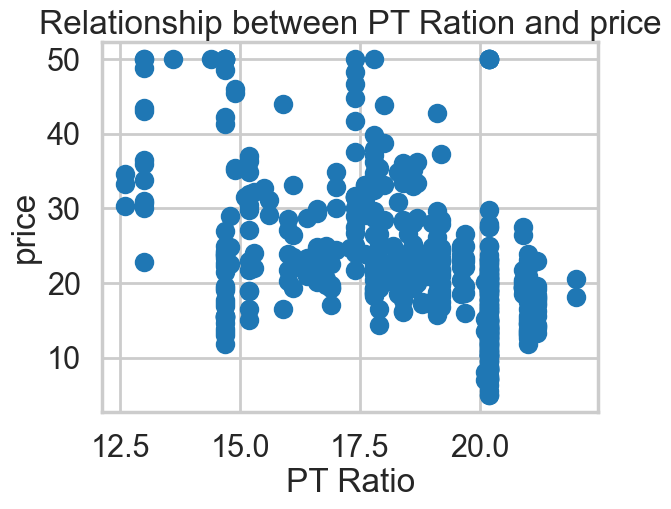

In [21]:
plt.scatter(bos.PTRATIO, bos.price)
plt.xlabel("PT Ratio")
plt.ylabel("price")
plt.title("Relationship between PT Ratio and price")



In [ ]:
#Exercise: Create scatter plots between *RM* and *PRICE*,
#and *PTRATIO* and *PRICE*. Label your axes appropriately using
#human readable labels. Tell a story about what you see.

# The graphs are the two above this cell, 
# The relationship between RM and price is linear, as RM goes up
# the housing price goes up as well.
# PT Ratio and price seem to be inversly related, as the PT Ratio
# goes up the price seems to go down.

Text(0.5, 1.0, 'Relationship between Age and home Price')

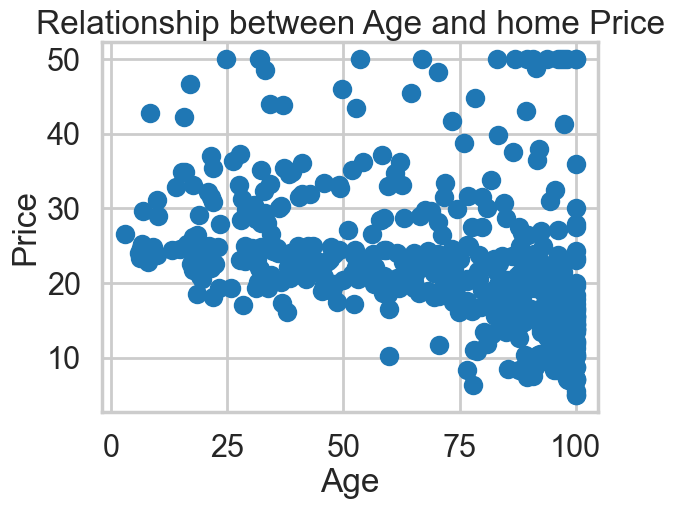

In [31]:
plt.scatter(bos.AGE, bos.price)
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Relationship between Age and home Price")

<Axes: xlabel='AGE', ylabel='price'>

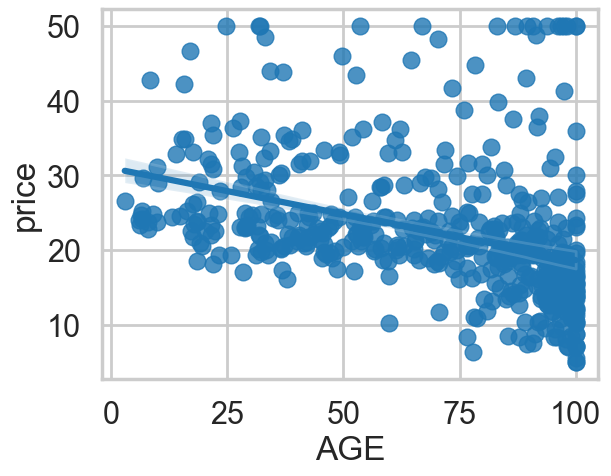

In [32]:
sns.regplot(y="price", x="AGE", data=bos, fit_reg=True)

In [ ]:
#Exercise: What are some other numeric variables of interest?
#Why do you think they are interesting? Plot scatterplots with
#these variables and *PRICE* (house price) and tell a story
#about what you see.


# The above two graphs are the graphs made for this question.
# It appears that as age increases the price of the home
# purchased decreases, indicating a inverse relationship.
# While age and price have a inverse relationship, age and
# quantity of homes purchased have a linear relationship

<Axes: xlabel='RM', ylabel='price'>

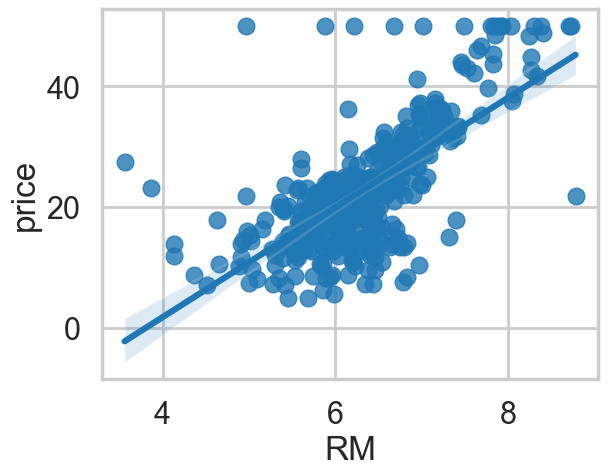

In [22]:
sns.regplot(y="price", x="RM", data=bos, fit_reg=True )

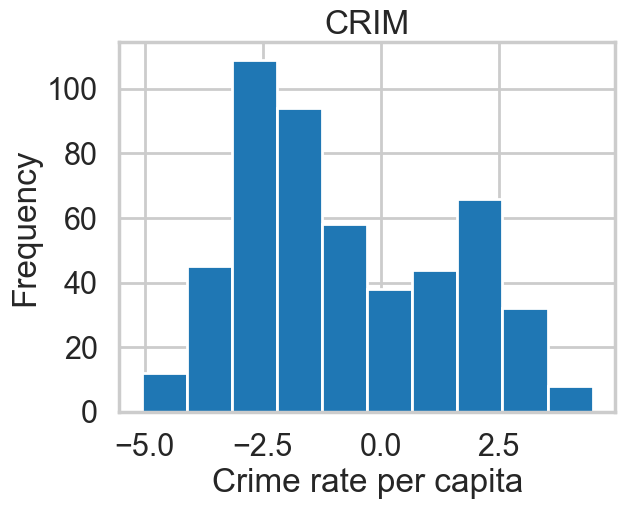

In [23]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

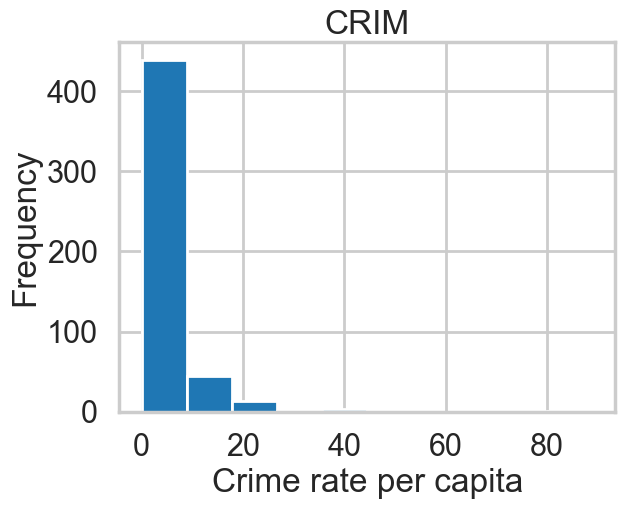

In [33]:
#Part 2 Checkup Exercise Set II
# Exercise: In the above histogram, we took the logarithm of
# the crime rate per capita. Repeat this histogram without
# taking the log. What was the purpose of taking the log? 
# What do we gain by making this transformation? What do 
# you now notice about this variable that is not obvious
# without making the transformation?


plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Taking the log of the datset helped to normalize the range of
# values so they are closer together,
# It also makes it more symmetric so it is easier to see the
# relationship in the data

# What I notice about that variable that is not obvious without
# taking the log is that the data seems to revolve around 0.
# As CRIM move away in either direction it increases then peaks 
# at 2.5 away from the center (-2.5 and 2.5) then it falls
# dramatically to near zero at 5 away from the center (-5 and 5)


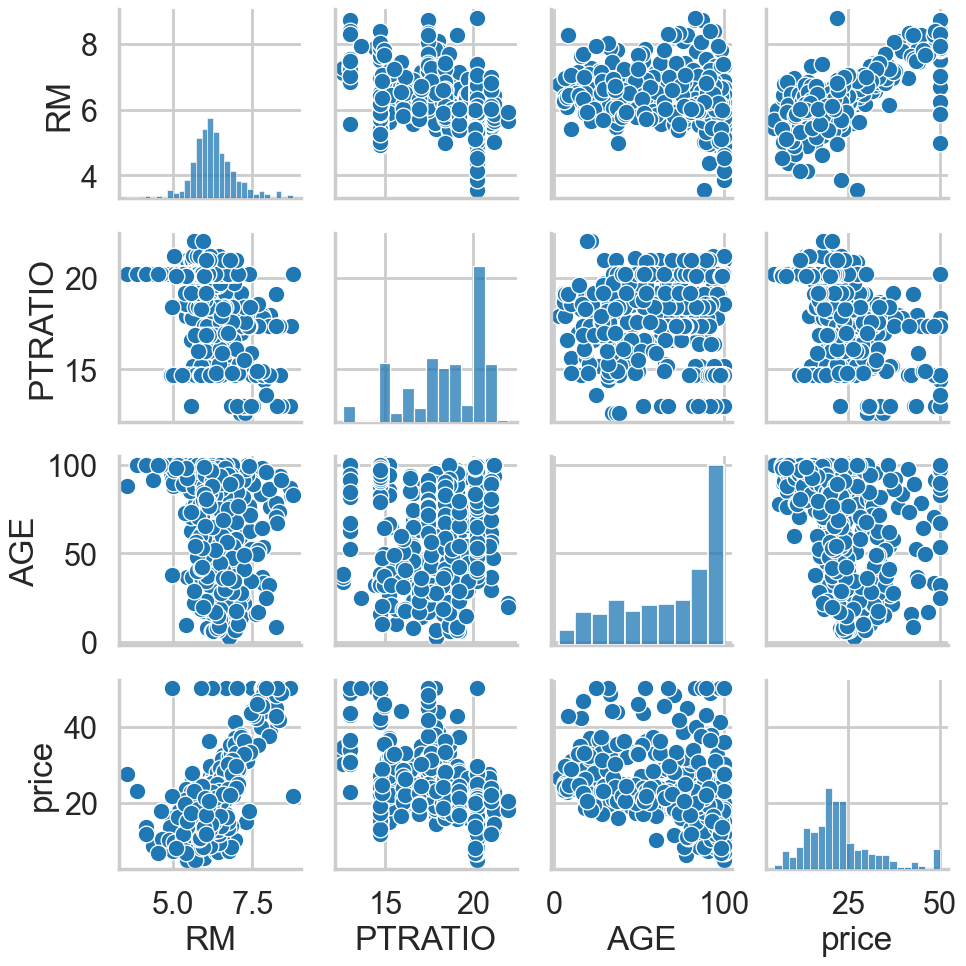

In [38]:
sns.pairplot(bos[["RM", "PTRATIO", "AGE", "price"]], diag_kind="hist")

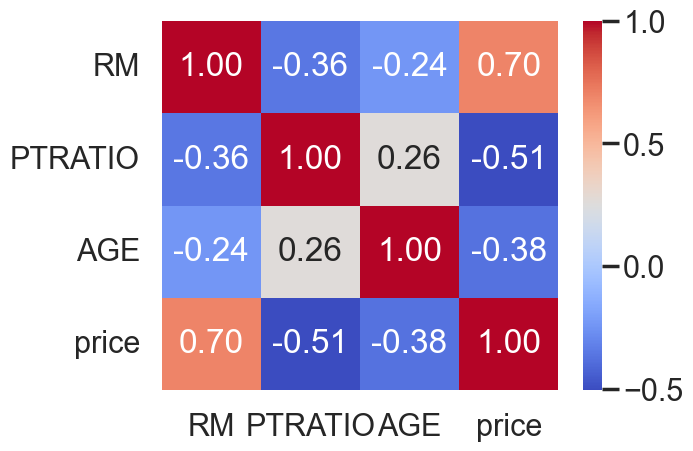

In [37]:
variables = ["RM", "PTRATIO", "AGE", "price"]
corr_matrix = bos[variables].corr()
sns.heatmap(corr_matrix, cmap ="coolwarm", annot = True, fmt= ".2f")

plt.show()

In [ ]:
# The above graphs are in response to the following prompt,
# Exercise: Plot the histogram for *RM* and *PTRATIO* against
# each other, along with the two variables you picked in the
# previous section. We are looking for correlations in
# predictors here.

# The strongest correlation is between the number of rooms and
# the price, which makes sense as larger houses cost more.
# The second strongest correlation is between PT Ratio and price
# The relationship in -0.51 which makes it negatively correlated
# This makes sense as well since the lower the ratio, the
# higher the home value. Meaning buyers value school districts
# where teachers can focus more on each student.



In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
m = ols("price ~ RM", bos).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.49e-74
Time:                        15:45:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Price')

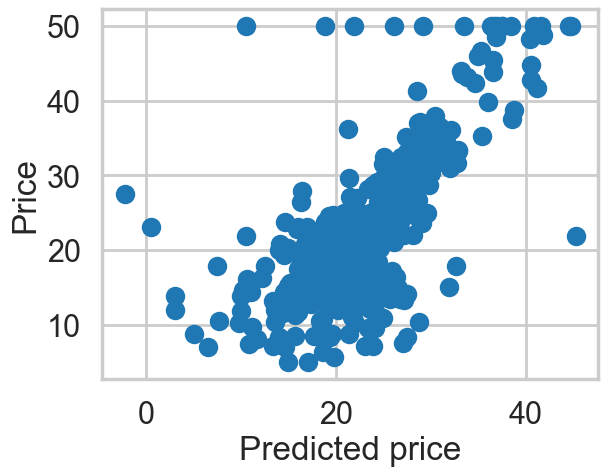

In [41]:
plt.scatter(m.fittedvalues, bos.price)
plt.xlabel("Predicted price")
plt.ylabel("Price")

In [69]:
corr_matrix = bos.price.corr(m.fittedvalues)
corr_matrix

0.6953599470715395

In [ ]:
# the fit is pretty good, as the correlation is at .695. 
# some things I did notice is that there were some very bad
# outliers, where the predicted price was above 40 and the
# actual price was 22. Also there was a predicted value of about
# 10 and the actual value was above 50.
# But the worst prediction was where the model predicted values 
# BELOW ZERO!
# I believe this has to do with the y intercept of the linear 
# model creating edge cases.

In [26]:
X = bos.drop("price", axis = 1)
lm =LinearRegression()
lm

LinearRegression()

In [27]:
lm.fit(X, bos.price)

LinearRegression()

In [71]:
# Part 3 Checkup Exercise Set II
# Exercise: How would you change the model to not fit an 
# intercept term? Would you recommend not having an intercept?
# Why or why not? 
# To change the model to not fit an intercept one could pass
# the parameter model = LinearRegression(fit_intercept=False)
# when building the model.
# In this particular case I would recommend having an intercept.
# By eliminating the intercept one would be forcing the model to
# pass through the origin (0,0) and then try and fit the data 
# in a line. This would be a mistake if the data had a naturally
# intercept. If one were to take a look at the graph below and 
# the cell after that we will notice that the prices would
# not be accurately represented by a line going through the
# origin, as the lowest value was 8.1 and the majority of low
# values are 10-15 range as represented in the bar graph

506

Text(0.5, 1.0, 'House Prices vs. Occurrences')

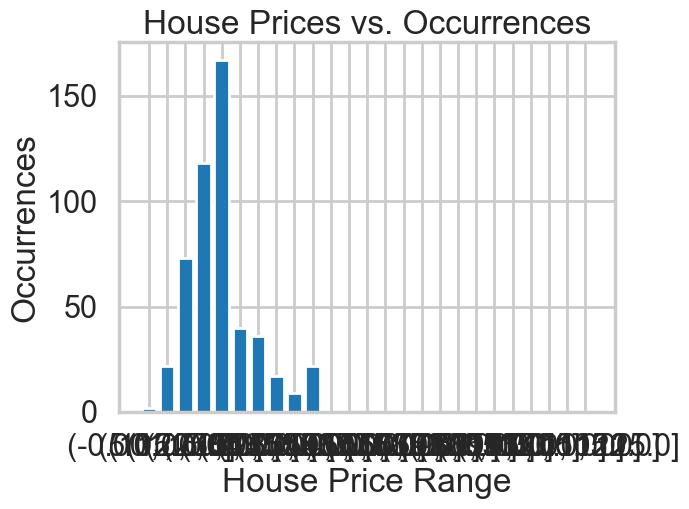

In [84]:
bins = pd.cut(bos['price'], bins=range(0, 130, 5), include_lowest=True)
counts = bins.value_counts(sort=False)

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('House Price Range')
plt.ylabel('Occurrences')
plt.title('House Prices vs. Occurrences')



In [85]:
counts = bos["price"].value_counts()
counts

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: price, Length: 229, dtype: int64

In [ ]:
# Part 3 Checkup Exercise Set II
# Exercise: One of the assumptions of the linear model is
# that the residuals must be i.i.d. (independently and
# identically distributed). To satisfy this, is it enough
# that the residuals are normally distributed? Explain your 
# answer.

# No that is not enough, for data to be i.i.d it must be
# independent for the other data. For instance time series data
# is not i.i.d for each datum is correlated with the preceding
# datum


# Exercise: True or false. To use linear regression, Y
# must be normally distributed. Explain your answer.
# False, the Y data being analyzed can be of any distribution,
# The predicted Y and the actual Y should be normally distributed
# around each other, but the Y does not have to be.


In [28]:
lm.intercept_

36.45948838509042

In [29]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [30]:
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [ ]:
# Part 3 Checkup Exercise Set III
# Exercise: Histogram: Plot a histogram of all the predicted 
# prices. Write a story about what you see. Describe the shape,
# center and spread of the distribution. Are there any outliers?
# What might be the reason for them? Should we do anything 
# special with them?


(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([-2.25801069,  2.49237998,  7.24277066, 11.99316134, 16.74355201,
        21.49394269, 26.24433337, 30.99472405, 35.74511472, 40.4955054 ,
        45.24589608]),
 <BarContainer object of 10 artists>)

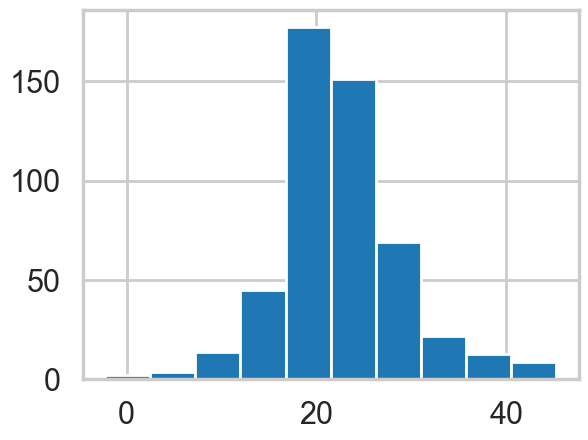

In [86]:
plt.hist(m.fittedvalues)

In [ ]:
# Part 3 Checkup Exercise Set III
# Exercise: Histogram: Plot a histogram of all the predicted
# prices. Write a story about what you see. Describe the shape,
# center and spread of the distribution. Are there any outliers?
# What might be the reason for them? Should we do anything
# special with them?

# Answer
# The data resembles a standard distribution, in is centered at 
# 20 with every delta of 5 (15, 25, 10, 30) the amount 
# predicted drops by more than half. The data is skewed to the 
# right side of the distribution.
# As for outliers there are some at zero and past 40. The
# potential reason for these outliers could be from bad
# data that has outliers that are effecting the model.
# If this is the case we could clean the data and remove
# these outliers and retrain the model. Or we could perform
# a log transform on the data to skew all the data to a 
# more similar range.

In [ ]:
# Exercise: Scatterplot: Let's plot the true prices compared 
# to the predicted prices to see they disagree (we did this with
# statsmodels` before).

Text(0, 0.5, 'Price')

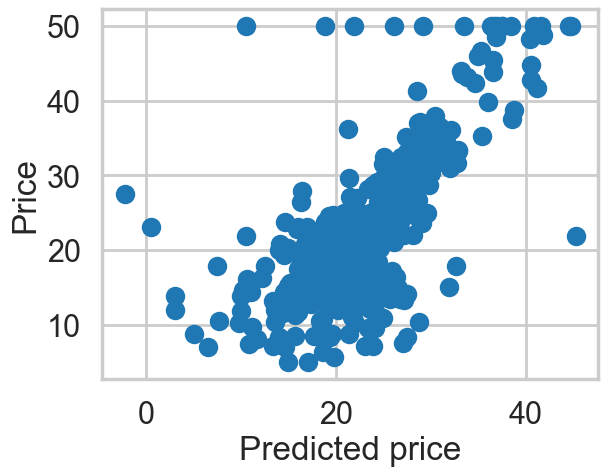

In [93]:
plt.scatter(m.fittedvalues, bos.price)
plt.xlabel("Predicted price")
plt.ylabel("Price")

In [ ]:
# Exercise: We have looked at fitting a linear model in
# both `statsmodels` and `scikit-learn`. What are the 
# advantages and disadvantages of each based on your
# exploration? Based on the information provided by both
# packages, what advantage does `statsmodels` provide?

# With statsmodels they provide detailed statistical info from
# the .summary attribute. This allows one to gain better
# understanding of the model and data. Also statsmodels give 
# a nice output of "m.fittedvalues" that makes it easy to 
# work with the outputed predictions of the model.
# For sklearn, the code to make the model seems cleaner and
# easier to learn. Also predicting specific values is simple
# with the .predict() method.

In [ ]:
# Part 3 Checkup Exercise Set IV
# Let's look at the relationship between `PTRATIO` and housing
# price.

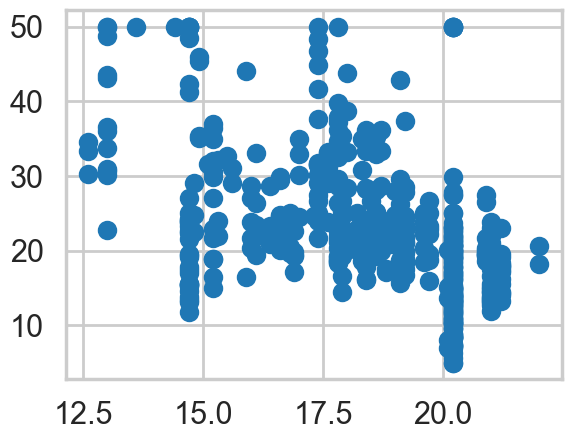

In [94]:
plt.scatter(bos['PTRATIO'], bos["price"])

In [101]:
ptr = bos["PTRATIO"].values.reshape(-1, 1)
vv = bos.price.values.reshape(-1, 1)

pt = LinearRegression()

pt.fit(ptr, vv)

LinearRegression()

In [103]:
coefficients = pt.coef_
coefficients

array([[-2.1571753]])

In [106]:
intercept = pt.intercept_
intercept

array([62.34462747])

In [ ]:
# Let's look at the relationship between `PTRATIO`
# and housing price.

# Exercise: Try fitting a linear regression model using only 
# the 'PTRATIO' (pupil-teacher ratio by town) and interpret
# the intercept and the coefficients.

# The coefficient is -2.157 and this makes sense as with every 
# time the student to teacher ratio increases by one the
# expected home values devreases by 2.157. Indicating that 
# houses in areas with higher student to teacher ratios
# are worth less.

# The intercept is 62.34 which does not make sense. If there 
# were a sudent teacher ratio of 0 then we would expect there
# to be no students or teachers which would make a housing
# location generally considered to be less valuable. 
# But the trend does make sense, as the student teacher ratio 
# approaches 0 the housing value increases as the teachers will
# have less students and can spend more time on each student.



In [ ]:
# Exercise: Calculate (or extract) the R^2 #value.
# What does it tell you?

In [108]:
r2=pt.score(ptr, vv)
r2

0.257847318009223

In [ ]:
# This means it can fit 25.78% of the variance in the model.
# This is a low percentage and indicates that it does not fit
# the data well

In [ ]:
# Exercise: Compute the F-statistic.
# What does it tell you?

In [111]:
fvalues, pvalues = f_regression(ptr, vv)
fvalues

C:\Users\Obama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([175.10554288])

In [ ]:
# The F statistic is 175, which means that it is statistically
# significant and that it has some value in predicting the 
# relationship between PTRATIO and price.

In [ ]:
# Exercise: Take a close look at the F-statistic and the 
# t-statistic for the regression coefficient. What relationship
# do you notice? Note that this relationship only applies in 
# *simple* linear regression models.

In [116]:
# f statistic
fvalues

array([175.10554288])

In [117]:
# regression coefficient
coefficients

array([[-2.1571753]])

In [118]:
# t statistic

In [121]:
beta_1 = pt.coef_[0]
beta_0 = pt.intercept_

y_pred = pt.predict(ptr)
residuals = vv - y_pred

n = len(ptr)
p = 1
MSE = np.sum(residuals**2) / (n - p - 1)
SE_beta_1 = np.sqrt(MSE / np.sum((ptr - np.mean(ptr))**2))
t_statistic = beta_1 / SE_beta_1

t_statistic

array([-13.2327451])

In [ ]:
# I could not figure out the relationship on my own, but thanks
# googling I now know that the F-statistic is the square of 
# the t-statistic!

In [ ]:
# Part 3 Checkup Exercise Set V
# Fit a linear regression model using three independent
# variables

# 1. 'CRIM' (per capita crime rate by town)
# 2. 'RM' (average number of rooms per dwelling)
# 3. PTRATIO' (pupil-teacher ratio by town)

# Exercise: Compute or extract the F-statistic.
# What does it tell you about the model?

# Exercise: Compute or extract the R^2 statistic.
# What does it tell you about the model?

# Exercise: Which variables in the model are significant in
# predicting house price? Write a story that interprets the
# coefficients.

In [128]:
# Pt 1

# Fit a linear regression model using three independent
# variables

# 1. 'CRIM' (per capita crime rate by town)
# 2. 'RM' (average number of rooms per dwelling)
# 3. PTRATIO' (pupil-teacher ratio by town)

j = ols("price ~ CRIM + RM + PTRATIO", bos).fit()
j.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           6.15e-98
Time:                        16:09:43   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
j.params

Intercept   -3.370704
CRIM        -0.204961
RM           7.380411
PTRATIO     -1.069546
dtype: float64

In [131]:
#Exercise: Compute or extract the 
#F-statistic. What does it tell you about the model?

# Here the F-Statistic is 245 which is high.
# Indicating that the model is a good fit for the data

#Exercise: Compute or extract the R^2 statistic.
#What does it tell you about the model?

# The R^2 is .59 which means ot explains 59% of the variance.
# That is not too bad, somewwhat moderate to good.

#Exercise: Which variables in the model are significant
#in predicting house price? Write a story that interprets
#the coefficients.

# The intercepts are listed in the cell above this one.
# The most significant variable to predict housing price is RM.
# This makes sense with a coefficient of 7.3, with every additional
# room that a house has the price goes up by 7.3 units.
# The PTRATIO (Pupil to Teacher ratio) is -1.069 meaning PTRATIO
# is inversely related to price. As PTRATIO increases price
# decreases.In other words,  for every additional student 
# in a class the surrounding house value decreases by
# 1.069 units
# For the last variable CRIM (per capita crime rate by town)
# the coefficient is -0.204. Which indicates a low inverse
# relationship. As CRIM goes up in an area the housing value
# decreases. For every percentage point increase in crime in 
# an area the corresponding house value decreases by 0.2 units.

In [133]:
# Part 4 Checkup Exercises
# Exercise: Find another variable (or two) to add to the
# model we built in Part 3. Compute the F-test comparing
# the two models as well as the AIC. Which model is better?

In [136]:
# Model from part 3 F statistic, R^2, and AIC
j.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           6.15e-98
Time:                        17:23:42   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
# New model F statistic, R^2, and AIC

nmn = ols("price ~ CRIM + RM + PTRATIO + CHAS + INDUS ", bos).fit()
nmn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.26e-101
Time:                        17:28:16   Log-Likelihood:                -1598.3
No. Observations:                 506   AIC:                             3209.
Df Residuals:                     500   BIC:                             3234.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3299      3.982     -0.334      0.738      -9.152       6.493
CRIM          -0.1583      0.033     -4.804      0.000      -0.223      -0.094
RM             6.8289      0.408     16.721      0.000       6.027       7.631
PTRATIO       -0.8984      0.134     -6.712      0.000      -1.161      -0.635
CHAS           3.7217      1.025      3.630      0.000       1.708       5.736
INDUS         -0.1939      0.045     -4.319      0.000      -0.282      -0.106
==============================================================================
Omnibus:                      250.323   Durbin-Watson:                   0.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2284.334
Skew:                           1.950   Prob(JB):                         0.00
Kurtosis:                      12.651   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# I would say the model from part 3 is better. The metrics for 
# AIC and F statistic worsened as I added CHAS and INDUS to the
# model. The only metric that increased was the R^2, which only
# increased by 0.022, which could easily be explained by simply
# adding more independent variables, instead of a higher quality
# model.

In [ ]:
# Part 5 Checkup Exercises
# Take the reduced model from Part 3 to answer the following
# exercises. Take a look at [this blog post](http://mpas
# tell.com/2013/04/19/python_regression/)
# for more information on using statsmodels to construct
# these plots.

In [ ]:
# Exercise: Construct a fitted values versus residuals plot.
# What does the plot tell you? Are there any violations of 
# the model assumptions?

In [142]:
residuals = j.resid

In [145]:
fitted_values = j.fittedvalues

In [147]:
expected_quantiles = stats.probplot(residuals, dist="norm", fit=False)[0]

Text(0.5, 1.0, 'Fitted Values vs Residuals')

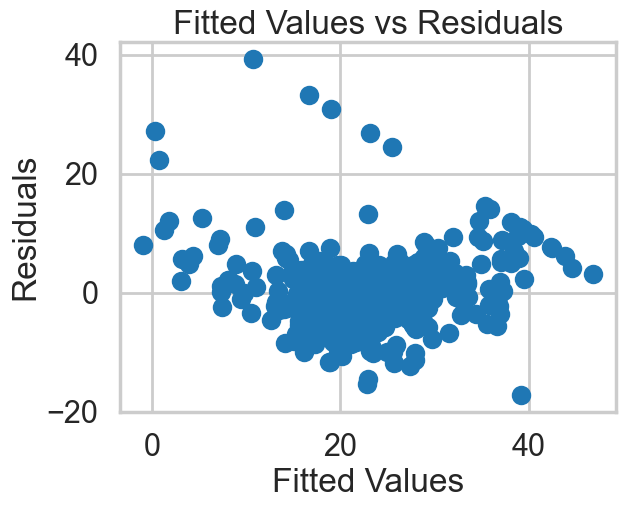

In [149]:
plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs Residuals")

In [ ]:
# There is a pattern in the graph.
# The graph shows a somewhat curved pattern indicating that
# some of the assumptions are violated.

In [ ]:
# Exercise: Construct a quantile plot of the residuals.
# What does the plot tell you?

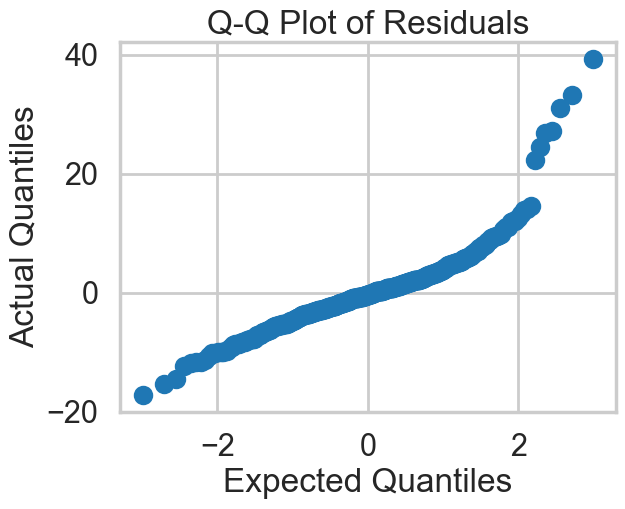

In [148]:
plt.scatter(expected_quantiles, sorted(residuals))
plt.xlabel('Expected Quantiles')
plt.ylabel('Actual Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
# The graph shows a somewhat linear relationship. The
# actual quantiles increase as expected quantiles increase.
# This means that the residuals are not standardly distributed.
# This is a violation of the assumptions made in a linear model.
# The reasons for this could be that the errors in each 
# coefficient are different.
# Also, the data underlying the model may not be independent of
# each other.

In [ ]:
# Exercise: What are some advantages and disadvantages of
# the fitted vs. residual and quantile plot compared to each
# other?

In [ ]:
# The fitted values v residuals plot can show whether the data
# follows a linear pattern or a more complex non-linear pattern.
# where as the qq plot can show a cleaner easier to visualize
# relationship of the distributions.

In [ ]:
# Exercise: Identify any outliers (if any) in your model
# and write a story describing what these outliers might
# represent.

In [ ]:
# There are multiple outliers in the data. Taking a look at the
# graph 9 cells above this one ( The "Fitted Values vs Residuals")
# we can see there are 7 data points with residuals above 20 and
# 1 as high as 40. These are good candidates for being outliers
# as most of the residuals lie around 0 to 10.
# These homes could be ouliers for many reasons.
# To understand these outliers lets examine the case of the 
# largest outlier.
# Looking closer at the largest outlier, the house with a
# residual of 40 has a predicted price 0f 10.7 and a real value
# of 50. We can look into the coefficients and associated 
# independent variables to see what is going on.
# The coefficients are
# CRIM=-0.205, RM=7.38, and PTRATIO=-1.069
# with a y intercept of -3.3.

# The associated independent variables are
# CRIM=4.89, RM=4.9, PTRATIO=20.2

# The variable increasing the prediction for the home value the 
# most is RM (4.9*7.38 = 36.162). 
#The variable decreasing the predicted price the most is PTRATIO
# (20.2*-1.069 = -21.59).
# The only other factors affecting the predicted price is CRIM
# (4.89822*-0.205 = -1.004) and the y intercept -3.3. These
# other factors have a weak effect so lets focus on RM and PTRATIO
# (Room number and pupil to teacher ratio).
# As we know the home value of 50 we can see that the model does
# get somewhat close to the predicted price based soley on room
# numbers, but the pupil to teacher ratio brings down the estimate
# substantially. 
# A non statistical human story for why this may be the case is
# perhaps the home has some other positive attributes such as 
# location, having a pool, and design that adds to the price
# that is not captured in the model. Another possibility is that
# the buyers in this area are retired and not taking into account
# factors like schools therefore the independent variable of 
# PTRATIO is not weighed at all in the price and therefore the 
# predicted price is being incorrectly decreased by an irrelevent
# factor.

In [ ]:
# Exercise: Construct a leverage plot and identify high
# leverage points in the model. Write a story explaining
# possible reasons for the high leverage points.

In [168]:
from statsmodels.graphics.regressionplots import *


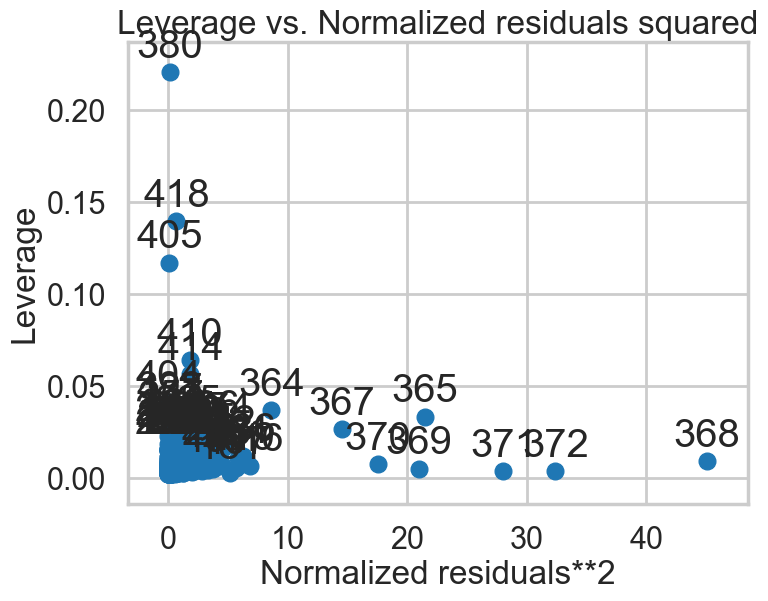

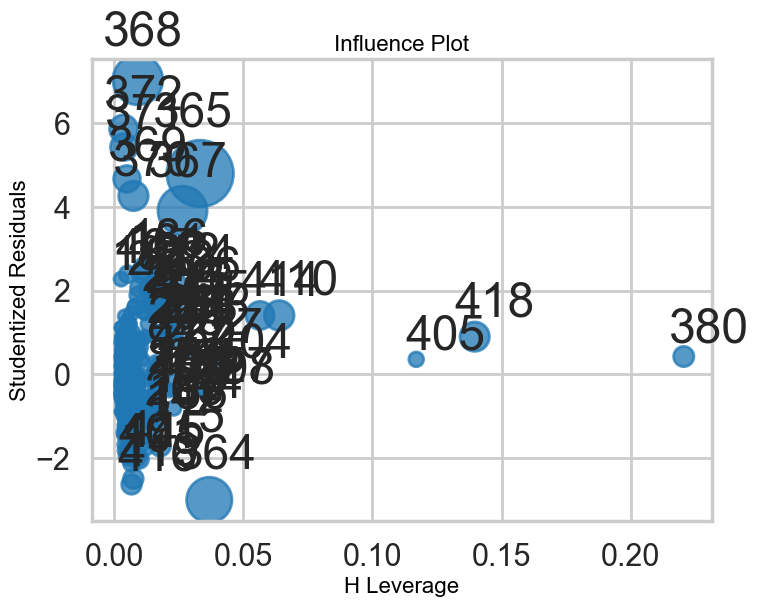

In [181]:

fig, ax = plt.subplots(figsize=(8,6))
plot_leverage_resid2(j, ax=ax, label="")
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
influence_plot(j,ax=ax, obs_labels=False, label="")
plt.show()

In [ ]:
# The highest leverage point in the data is data point 380.
# This is because the crime rate per capita in this area is 88.
# That number is massive compared to all the other crime rates.
# This is having a disproportionate effect on the coefficient 
# for crime rates. 
# The data point 380 has other values such as RN and PTRATIO 
# that the model looks at but the values for these categories
# are very normal and therefore are not the cause of the
# data point 380 being a high leverage point. Making the CRIM
# clearly the culprit.

# The second high leverage point is 418, it also has a high 
# crime rate at 73.5. Again, all other values for other categories
# are normal.
# The third and last high leverage point is data point 405.
# 405 follows the same pattern as the two previous data points.
# It has normal values for all categories except CRIM with a 
# value of 67.9

In [ ]:
# Exercise: Remove the outliers and high leverage points
# from your model and run the regression again.
# How do the results change?

# Below are the following statistics relating to this question.

In [201]:
j.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           6.15e-98
Time:                        22:14:23   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
w = bos.drop(index=[405, 418, 380])

z = ols("price ~ CRIM + RM + PTRATIO", w).fit()
z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.76e-96
Time:                        22:12:19   Log-Likelihood:                -1603.1
No. Observations:                 503   AIC:                             3214.
Df Residuals:                     499   BIC:                             3231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2366      4.047     -0.800      0.424     -11.187       4.714
CRIM          -0.2408      0.044     -5.479      0.000      -0.327      -0.154
RM             7.3125      0.407     17.945      0.000       6.512       8.113
PTRATIO       -1.0485      0.134     -7.815      0.000      -1.312      -0.785
==============================================================================
Omnibus:                      239.356   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2053.489
Skew:                           1.876   Prob(JB):                         0.00
Kurtosis:                      12.160   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Exercise: Remove the outliers and high leverage points
# from your model and run the regression again.
# How do the results change?

# The model got worse. The R^2 and F-Statistic decreased. 
# This indicates that the model is not fitting the data as well.
# Seeing this change one might ask themselves the following 
# question.
# This seems counter intuitive. Would'nt removing the outlier
# high leverage data points that are very large in comparison
# to other observations help the model? Why did it get worse?

# Well the anwer lies in the fact that sometimes high leverage 
# points can help the model. We can take a look at the residuals
# of these points in the original model. We will then notice
# that the residual for these points are very close to 0. This
# means that the predicted values of homes and the actual value 
# of these homes for 380, 405, and 418 were very close. 
# This indicates that including these values helped the model
# make the connection that areas with high crime rates make 
# house value decrease there by helping the model correctly 
# predict all home values.
